## Analysis of Termite Discovery in Puerto Rico

### Background
In this analysis, we explore the relationship between the weight of wood blocks before and after potential termite discovery. Using a Perceptron model, we aim to predict termite discovery in Puerto Rico based on changes in wood weight. This approach is predicated on the hypothesis that significant weight loss in wood might indicate termite activity. 


## Loading the Dataset

We start by loading our termite dataset into a pandas DataFrame. This dataset includes various features, but we are particularly interested in the latitude and longitude for predicting termite discovery.

The following code block handles the loading of the dataset:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Load the dataset
df = pd.read_csv(r'C:\Users\isabe\INDE 577\INDE-577\global_termite_microbe_wd.csv')


## Filtering the Dataset for a Specific Country

Our analysis focuses on the test sites in Puerto Rico. We filter our dataset to include only those entries, as this will allow us to concentrate on a specific ecological region which could have its unique termite activity patterns.

Here's how we filter the DataFrame:

In [10]:
# Filtering the data for Puerto Rico
selected_country = 'Puerto_Rico'
country_data = df[df['country'] == selected_country]

# Selecting relevant columns and removing rows with missing values
relevant_columns = ['initial_wt', 'final_wt', 'termite_discovery']
selected_country_data = country_data[relevant_columns].dropna()

# Check for remaining missing values
missing_values_clean = selected_country_data.isnull().sum()
missing_values_clean

initial_wt           0
final_wt             0
termite_discovery    0
dtype: int64

## Data Splitting

To evaluate the performance of our perceptron model properly, we need to split the data into training, validation, and testing sets. A common split ratio is 60% for training, 20% for validation, and 20% for testing.

Below is the code to perform this split:

In [11]:
# Splitting the data into features (X) and target (y)
X_country = selected_country_data[['initial_wt', 'final_wt']]
y_country = selected_country_data['termite_discovery']

# Splitting the dataset (60% training, 20% validation, 20% testing)
X_train_country, X_temp_country, y_train_country, y_temp_country = train_test_split(X_country, y_country, test_size=0.4, random_state=42)
X_val_country, X_test_country, y_val_country, y_test_country = train_test_split(X_temp_country, y_temp_country, test_size=0.5, random_state=42)

## Perceptron Model Initialization and Training

After preprocessing our data and splitting it into appropriate training and validation sets, the next step is to initialize our machine learning model. In this case, we will be using the perceptron model, a type of linear classifier. We will be using the Perceptron model from the sklearn python package.

### What is a Perceptron?

The perceptron is a fundamental building block for neural networks. It's a binary classifier that maps its input \( x \) (a vector of real numbers) to an output value \( f(x) \) (a single binary value):

$$ f(x) = 
\begin{cases} 
1 & \text{if } w \cdot x + b > 0, \\
0 & \text{otherwise} 
\end{cases} $$

where \( w \) is a vector of weights, \( b \) is a bias term, and \( w \cdot x \) is the dot product between the weights and the input vector.

### Training the Perceptron

To train the perceptron, we use the `fit` method with our training data. The perceptron will learn the weights \( w \) and the bias \( b \) based on the input features (latitude and longitude) to predict whether termites will discover the wood block (`termite_discovery`).

Here's the code to initialize and train the perceptron:


In [12]:
# Initialize the Perceptron model
perceptron_country = Perceptron()

# Train the model on the training data
perceptron_country.fit(X_train_country, y_train_country)

# Predict on the validation data
y_val_pred_country = perceptron_country.predict(X_val_country)

# Calculate and output the accuracy on the validation set
val_accuracy_country = accuracy_score(y_val_country, y_val_pred_country)
val_accuracy_country


0.9020979020979021

After training, the model can make predictions on unseen data. The performance of the model can be evaluated by its accuracy on the validation set, which tells us the proportion of the validation samples that the model predicted correctly.


## Data Visualization

In order to understand our model and its results, it's crucial to understand the data we're working with. Visualizing the data can give us insights into the distribution of the different classes and how well they might be separated by a linear classifier like the perceptron.

### Scatter Plot of Data Points

Let's start by plotting our data points. We will use a scatter plot where the x-axis represents `latitude` and the y-axis represents `longitude`. The color of the points will indicate whether termites have discovered the wood block (`blue` for discovered, `red` for not discovered).

### Decision Boundary

After plotting the data points, we'll add the decision boundary determined by our perceptron model. This boundary is the line that the model has learned to separate the discovered blocks from the undiscovered ones. It's important to note that a perceptron is a linear classifier, which means that it will create a straight-line boundary.

### Implementation

The code to create these visualizations is as follows:

c:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(
C:\Users\isabe\AppData\Local\Temp\ipykernel_25400\522845141.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl].iloc[:, 0], y=X[y == cl].iloc[:, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


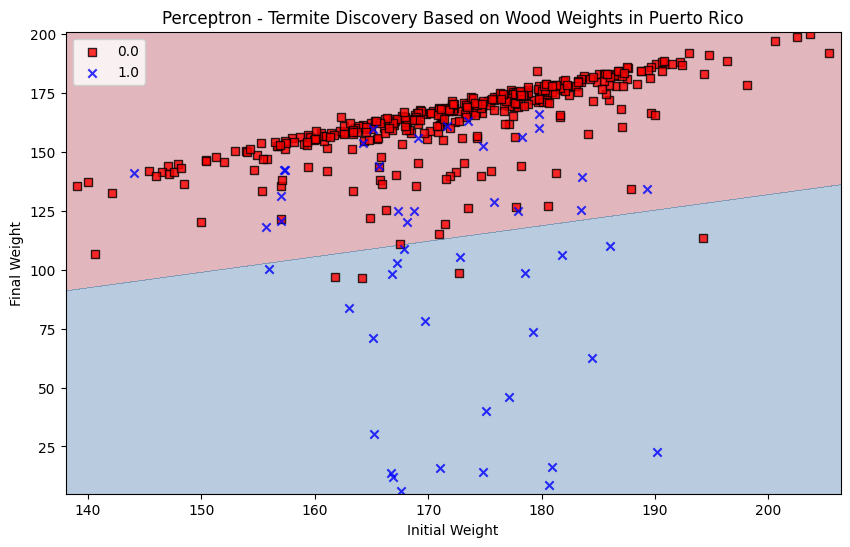

In [13]:
# Function to plot the decision boundary for Puerto Rico data
def plot_decision_boundary_country(X, y, classifier, resolution=0.02):
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = plt.cm.RdBu

    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl].iloc[:, 0], y=X[y == cl].iloc[:, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

plt.figure(figsize=(10, 6))
plot_decision_boundary_country(X_train_country, y_train_country, classifier=perceptron_country)
plt.xlabel('Initial Weight')
plt.ylabel('Final Weight')
plt.legend(loc='upper left')
plt.title('Perceptron - Termite Discovery Based on Wood Weights in Puerto Rico')
plt.show()


### Confusion Matrix 

Another helpful data visualization for classifiers is a **confustion matrix**. A **confusion matrix** is a table often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class, or vice versa.

Here's what each term in a confusion matrix represents:
- **True Positives (TP)**: The cases in which the model correctly predicted the positive class.
- **True Negatives (TN)**: The cases in which the model correctly predicted the negative class.
- **False Positives (FP)**: The cases in which the model incorrectly predicted the positive class.
- **False Negatives (FN)**: The cases in which the model incorrectly predicted the negative class.

The confusion matrix is useful because it provides a detailed breakdown of the model's performance, particularly the types of errors made by the model.

### Confusion Matrix for Our Model

For our Perceptron model trained on termite discovery data from Puerto Rico, the confusion matrix looks like this:

$$
\left[
\begin{array}{cc}
\textbf{TN: 123} & \textbf{FP: 1} \\
\textbf{FN: 13} & \textbf{TP: 6} \\
\end{array}
\right]
$$

From this matrix, we can derive several useful metrics:

- **Accuracy**: (TP + TN) / (TP + TN + FP + FN) = (6 + 123) / (6 + 123 + 1 + 13) ≈ 90.4%
- **Precision**: TP / (TP + FP) = 6 / (6 + 1) ≈ 85.7%
- **Recall**: TP / (TP + FN) = 6 / (6 + 13) ≈ 31.6%
- **F1 Score**: 2 * (Precision * Recall) / (Precision + Recall) ≈ 46.2%

### Insights from the Model's Performance

- **High Accuracy and Precision**: The model is generally accurate and has a high precision, indicating it is reliable when it predicts a termite discovery.
- **Low Recall**: The recall is quite low, which means the model misses a significant number of actual positive cases (termite discoveries). This could be problematic if the cost of missing actual termite discoveries is high.
- **Moderate F1 Score**: The F1 score, which balances precision and recall, is moderate, indicating room for improvement, especially in terms of recall.


This detailed analysis helps us understand not just the overall accuracy of the model, but also specific areas where the model might be improved to better meet the needs of termite discovery prediction in Puerto Rico.


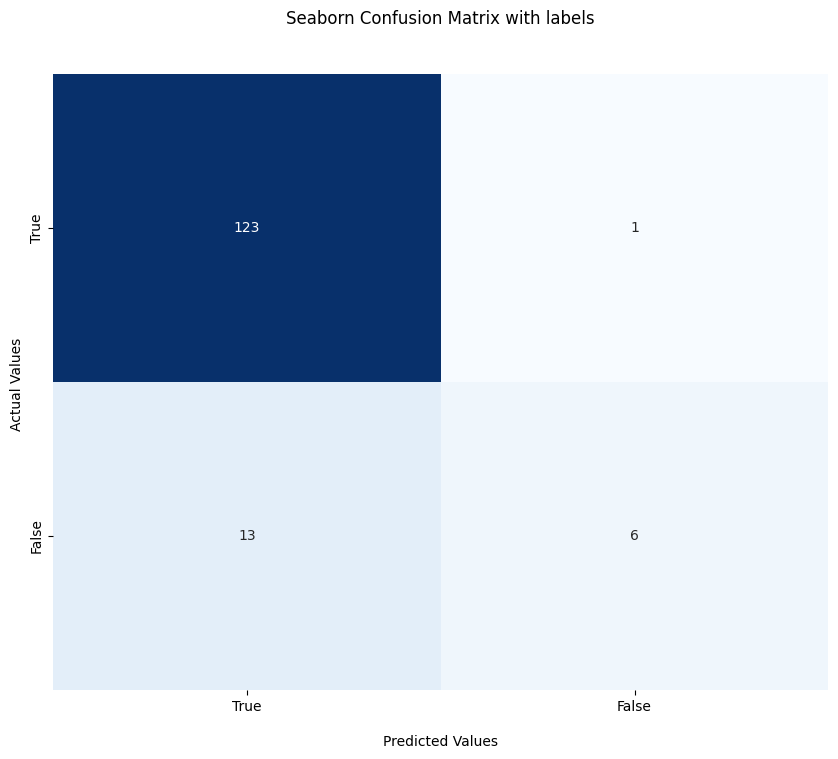

In [17]:

# Predict on the validation data
y_val_pred_country = perceptron_country.predict(X_val_country)

# Create the confusion matrix
confusion_mat = confusion_matrix(y_val_country, y_val_pred_country)
confusion_mat

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False, fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True', 'False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

### Intuition Behind the Results
The key finding is that lower final weights of the wood blocks correspond to termite discovery. This relationship aligns well with our understanding of termite behavior and wood decomposition. Here's the intuition:

- **Termite Consumption**: Termites consume wood, leading to a reduction in its weight. Therefore, if a wood block has a significantly lower final weight compared to its initial weight, it is likely that termites have discovered and consumed part of it.
  
- **Model's Decision Boundary**: The perceptron model has learned this pattern from the data. The decision boundary on the plot effectively separates wood blocks with substantial weight loss (indicative of termite activity) from those with minimal changes in weight.

- **Implications**: These results are valuable for understanding termite activity patterns in Puerto Rico. By analyzing the weight loss of wood blocks, we can predict termite discovery with 90% accuracy, indicating a strong predictive capability even though the data is not linearly separable. The Perceptron model's high accuracy and the logical correlation between final weight reduction and termite discovery underscore its utility in data analysis. This insight could be instrumental in ecological studies and pest management strategies in the region.

### Conclusion

From the example above, we can observe the following:
- The perceptron model attempts to draw a linear boundary between the two classes.
- The data points for our two classes seem to overlap significantly, which could indicate why a simple model like a perceptron might struggle to perfectly separate the classes.
- Areas with a higher density of one class over the other are easier to separate with a linear boundary, while isolated points of one class within the area of another class are misclassified.


We should keep in mind that this is a simple visualization in a two-dimensional space. Our actual data might have more complexity that isn't captured in this plot. Moreover, if the perceptron model does not perform as well as we'd like, we might need to explore more complex models or feature engineering.